In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import re

# Specify the path to the main folder using a raw string
main_folder_path = Path(r"C:\Users\acer\Desktop\Xebia_Internship")

# Initialize an empty list to store the content
data = []

# Helper function to read file content with a fallback encoding
def read_file_with_fallback(file_path):
    try:
        with file_path.open('r', encoding='utf-8') as file:
            return file.read()
    except UnicodeDecodeError:
        with file_path.open('r', encoding='latin-1') as file:
            return file.read()

# Traverse the directory tree recursively and read text files
for i, text_file in enumerate(main_folder_path.rglob('*.txt'), start=1):  # Match all text files recursively
    if text_file.is_file() and text_file.suffix == '.txt':  # Ensure it is a text file
        content = read_file_with_fallback(text_file)
        # Append the content and serial number to the data list
        data.append((i, content))

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=['S No.','content'])

# Save the DataFrame to a CSV file if needed
df.to_csv('document_cluster.csv', index=False)
df = pd.read_csv('document_cluster.csv')
df

,S No.,content
0,1,Ad sales boost Time Warner profit\n\nQuarterly...
1,2,Dollar gains on Greenspan speech\n\nThe dollar...
2,3,Yukos unit buyer faces loan claim\n\nThe owner...
3,4,High fuel prices hit BA's profits\n\nBritish A...
4,5,Pernod takeover talk lifts Domecq\n\nShares in...
...,...,...
3220,3221,BT program to beat dialler scams\n\nBT is intr...
3221,3222,Spam e-mails tempt net shoppers\n\nComputer us...
3222,3223,Be careful how you code\n\nA new European dire...
3223,3224,US cyber security chief resigns\n\nThe man mak...


# Pre-Processing

In [2]:
import pandas as pd
import re
import nltk
import spacy

# Function to remove HTML tags
def remove_html_tags(text):
    clean_text = re.sub(r'<.*?>', '', text)
    return clean_text

# Function to remove special characters
def remove_special_characters(text):
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return clean_text

# Function to clean text
def clean_text(text):
    text = remove_html_tags(text)
    text = remove_special_characters(text)
    return text

# Clean the content in the dataset
df['content'] = df['content'].apply(clean_text)
df

,S No.,content
0,1,Ad sales boost Time Warner profit\n\nQuarterly...
1,2,Dollar gains on Greenspan speech\n\nThe dollar...
2,3,Yukos unit buyer faces loan claim\n\nThe owner...
3,4,High fuel prices hit BAs profits\n\nBritish Ai...
4,5,Pernod takeover talk lifts Domecq\n\nShares in...
...,...,...
3220,3221,BT program to beat dialler scams\n\nBT is intr...
3221,3222,Spam emails tempt net shoppers\n\nComputer use...
3222,3223,Be careful how you code\n\nA new European dire...
3223,3224,US cyber security chief resigns\n\nThe man mak...


In [3]:
df["content"] = df["content"].str.lower()
df

,S No.,content
0,1,ad sales boost time warner profit\n\nquarterly...
1,2,dollar gains on greenspan speech\n\nthe dollar...
2,3,yukos unit buyer faces loan claim\n\nthe owner...
3,4,high fuel prices hit bas profits\n\nbritish ai...
4,5,pernod takeover talk lifts domecq\n\nshares in...
...,...,...
3220,3221,bt program to beat dialler scams\n\nbt is intr...
3221,3222,spam emails tempt net shoppers\n\ncomputer use...
3222,3223,be careful how you code\n\na new european dire...
3223,3224,us cyber security chief resigns\n\nthe man mak...


In [4]:
import string
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Initialize NLTK stop words
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Remove punctuation
df['content'] = df['content'].apply(remove_punctuation)

# Remove stopwords
df['content'] = df['content'].apply(remove_stopwords)

df

,S No.,content
0,1,ad sales boost time warner profit quarterly pr...
1,2,dollar gains greenspan speech dollar hit highe...
2,3,yukos unit buyer faces loan claim owners embat...
3,4,high fuel prices hit bas profits british airwa...
4,5,pernod takeover talk lifts domecq shares uk dr...
...,...,...
3220,3221,bt program beat dialler scams bt introducing t...
3221,3222,spam emails tempt net shoppers computer users ...
3222,3223,careful code new european directive could put ...
3223,3224,us cyber security chief resigns man making sur...


# Lemmatization

In [6]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Function to get the part of speech tag for lemmatization
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Function to lemmatize text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Lemmatize the text
df['content'] = df['content'].apply(lemmatize_text)
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,S No.,content
0,1,ad sale boost time warner profit quarterly pro...
1,2,dollar gain greenspan speech dollar hit high l...
2,3,yukos unit buyer face loan claim owner embattl...
3,4,high fuel price hit ba profit british airway b...
4,5,pernod takeover talk lift domecq share uk drin...
...,...,...
3220,3221,bt program beat dialler scam bt introduce two ...
3221,3222,spam email tempt net shopper computer user acr...
3222,3223,careful code new european directive could put ...
3223,3224,u cyber security chief resigns man make sure u...


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['content'])

# Display the TF-IDF matrix
print(X)


  (0, 37851)	0.03246804804911771
  (0, 22594)	0.034088574713407815
  (0, 7907)	0.03184035653195183
  (0, 30637)	0.02333542777335974
  (0, 14491)	0.05559988270179212
  (0, 34146)	0.12252988792598336
  (0, 29486)	0.04084329597532779
  (0, 7333)	0.07172996683282133
  (0, 29412)	0.04700662409790998
  (0, 25108)	0.029339360660691392
  (0, 16721)	0.03463012829696075
  (0, 38627)	0.02056680652988756
  (0, 4558)	0.04700662409790998
  (0, 19875)	0.03656682797143015
  (0, 2993)	0.05161703284001298
  (0, 28998)	0.03551273422137669
  (0, 30708)	0.038440544172910845
  (0, 21944)	0.03216938515674547
  (0, 6119)	0.043538401435056884
  (0, 32516)	0.042134329844756645
  (0, 25447)	0.021055721857712914
  (0, 5340)	0.03246804804911771
  (0, 14426)	0.03372890715396444
  (0, 37042)	0.043075927208847904
  (0, 30883)	0.03457440373791205
  :	:
  (3224, 4371)	0.009935794744229166
  (3224, 14742)	0.013514840826678991
  (3224, 6000)	0.015231667212071965
  (3224, 17412)	0.017513532227907667
  (3224, 18116)	0.0066

# Dimensionality Reduction

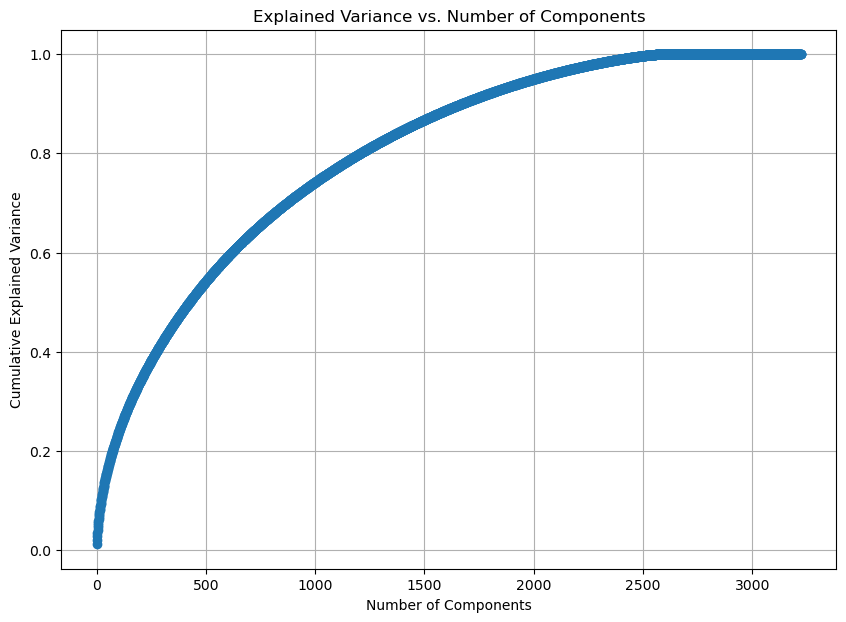

Number of components to retain 90% variance: 1672
Number of components to retain 95% variance: 2003


In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Initialize PCA
pca = PCA()

# Fit PCA on the data
pca.fit(X.toarray())

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 7))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Find the number of components for 90% variance
n_components_90 = np.argmax(cumulative_explained_variance >= 0.90) + 1
print(f'Number of components to retain 90% variance: {n_components_90}')

# Find the number of components for 95% variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Number of components to retain 95% variance: {n_components_95}')


In [13]:
# Assuming n_components is the number of components you determined (e.g., n_components_90)

# Initialize PCA with the chosen number of components
pca = PCA(n_components=1672)

# Fit and transform the TF-IDF matrix
X_reduced = pca.fit_transform(X.toarray())
print(X_reduced)

# Display the shape of the reduced data to confirm dimensionality reduction
print(f"Shape of the data after 90% variance PCA: {X_reduced.shape}")

[[-0.03665219 -0.11339506  0.02970707 ...  0.02377722 -0.00765174
  -0.00502236]
 [ 0.0429983  -0.13579281 -0.01858361 ...  0.0101666   0.01338659
  -0.00420727]
 [ 0.01735114 -0.05209527 -0.02473787 ... -0.00436332 -0.0046412
   0.00926531]
 ...
 [ 0.03111974 -0.06958071  0.0088868  ...  0.00852913  0.01007573
  -0.00355878]
 [ 0.02115441 -0.05387438  0.01963881 ...  0.00035872  0.00440744
   0.00132511]
 [-0.07199097  0.013928   -0.06225573 ... -0.00605031 -0.00197437
   0.00110483]]
Shape of the data after 90% variance PCA: (3225, 1672)
